# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
plt.style.use("seaborn-white")
# sb.set_style("whitegrid")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("Crime_Reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360827 entries, 0 to 2360826
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 166
Occurred Date                        0
Occurred Time                       85
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21102
Address                             13
Zip Code                         14820
Council District                 47941
APD Sector                        9445
APD District                      9935
PRA                              11270
Census Tract                   1380191
Clearance Status                614108
Clearance Date                  344930
UCR Category                   1552717
Category Description           1552717
X-coordinate                     10658
Y-coordinate                     10658
Latitude                         40192
Longitude                

Incident Number Highest Offense Description  Highest Offense Code  \
0      20191571574               FRAUD - OTHER                  1199   
1      20191550153              DEADLY CONDUCT                   408   
2      20195022816      THEFT OF LICENSE PLATE                   614   
3      20205007833               RUNAWAY CHILD                  4100   
4      20191671388       BURGLARY OF RESIDENCE                   500   

  Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
0               N  06/03/2019 04:00:00 PM    06/03/2019         1600.0   
1               N  06/04/2019 03:12:00 AM    06/04/2019          312.0   
2               N  06/03/2019 03:00:00 PM    06/03/2019         1500.0   
3               N  02/22/2020 06:00:00 PM    02/22/2020         1800.0   
4               N  06/14/2019 12:00:00 PM    06/14/2019         1200.0   

         Report Date Time Report Date  Report Time  \
0  06/06/2019 05:34:00 PM  06/06/2019       1734.0   
1  06/04/2019 03:16:00 AM  06/04/2019        316.0   
2  06/04/2019 03:22:00 PM  06/04/2019       1522.0   
3  02/24/2020 06:03:00 PM  02/24/2020       1803.0   
4  06/16/2019 10:00:00 PM  06/16/2019       2200.0   

                 Location Type                       Address  Zip Code  \
0  DEPARTMENT / DISCOUNT STORE            10817 BALLARD PATH   78717.0   
1             RESIDENCE / HOME          8312 N IH 35 SVRD SB   78753.0   
2             RESIDENCE / HOME                6312 LIBYAN DR   78745.0   
3             RESIDENCE / HOME            13012 DEARBONNE DR   78617.0   
4             RESIDENCE / HOME  3809 SPICEWOOD SPRINGS RD EB   78731.0   

   Council District APD Sector APD District    PRA  Census Tract  \
0               6.0         AD            5  573.0        203.11   
1               4.0         ED            1  250.0         18.06   
2               2.0         FR            4  509.0         24.09   
3               2.0         HE            7  612.0           NaN   
4              10.0         BA            8  256.0         17.51   

  Clearance Status Clearance Date UCR Category Category Description  \
0              NaN            NaN          NaN                  NaN   
1                N     06/06/2019          13A   Aggravated Assault   
2                N     06/04/2019          23G                Theft   
3                N     03/03/2020          NaN                  NaN   
4                N     09/18/2019          220             Burglary   

   X-coordinate  Y-coordinate   Latitude  Longitude  \
0     3097785.0     3097785.0  30.483646 -97.789495   
1     3128227.0     3128227.0  30.346646 -97.696573   
2     3098393.0     3098393.0  30.205267 -97.794900   
3     3155456.0     3155456.0  30.176140 -97.615031   
4     3111039.0     3111039.0  30.364987 -97.750587   

                      Location  
0   (30.48364631, -97.7894953)  
1  (30.34664576, -97.69657342)  
2  (30.20526729, -97.79490043)  
3   (30.17613952, -97.6150307)  
4  (30.36498691, -97.75058749)

Incident Number     Highest Offense Description  \
2360822      20113140947              ROBBERY BY ASSAULT   
2360823    2003924743563             BURGLARY OF VEHICLE   
2360824       2005370363  ASSAULT W/INJURY-FAM/DATE VIOL   
2360825      20153031816                           THEFT   
2360826       2007320198                             DWI   

         Highest Offense Code Family Violence      Occurred Date Time  \
2360822                   303               N  11/07/2011 03:00:00 PM   
2360823                   601               N  05/29/2003 08:00:00 AM   
2360824                   900               N  02/06/2005 02:52:00 AM   
2360825                   600               N  10/30/2015 04:44:00 PM   
2360826                  2100               N  02/01/2007 03:04:00 AM   

        Occurred Date  Occurred Time        Report Date Time Report Date  \
2360822    11/07/2011         1500.0  11/10/2011 02:09:00 PM  11/10/2011   
2360823    05/29/2003          800.0  05/29/2003 12:36:00 PM  05/29/2003   
2360824    02/06/2005          252.0  02/06/2005 02:52:00 AM  02/06/2005   
2360825    10/30/2015         1644.0  10/30/2015 04:44:00 PM  10/30/2015   
2360826    02/01/2007          304.0  02/01/2007 03:04:00 AM  02/01/2007   

         Report Time                 Location Type  \
2360822       1409.0  STREETS / HWY / ROAD / ALLEY   
2360823       1236.0         PARKING LOTS / GARAGE   
2360824        252.0              RESIDENCE / HOME   
2360825       1644.0         GROCERY / SUPERMARKET   
2360826        304.0  STREETS / HWY / ROAD / ALLEY   

                            Address  Zip Code  Council District APD Sector  \
2360822  BRODIE LN / W SLAUGHTER LN   78748.0               5.0         DA   
2360823              1000 E 41ST ST   78751.0               9.0         BA   
2360824             6201 BERKMAN DR   78723.0               1.0         ID   
2360825         2400 S CONGRESS AVE   78704.0               3.0         DA   
2360826    1900 E WILLIAM CANNON DR   78744.0               2.0         FR   

        APD District  PRA  Census Tract Clearance Status Clearance Date  \
2360822            7   89           NaN                N     01/02/2012   
2360823            5  332           NaN                N     05/30/2003   
2360824            3  294         21.12                C     02/07/2005   
2360825            2  475           NaN                C     11/02/2015   
2360826            8  516           NaN                C     02/01/2007   

        UCR Category Category Description  X-coordinate  Y-coordinate  \
2360822          120              Robbery     3081231.0     3081231.0   
2360823          23F                Theft     3121344.0     3121344.0   
2360824          NaN                  NaN     3130170.0     3130170.0   
2360825          23H                Theft     3110844.0     3110844.0   
2360826          NaN                  NaN     3107994.0     3107994.0   

          Latitude  Longitude                     Location  
2360822  30.183547 -97.849801  (30.18354694, -97.84980077)  
2360823  30.300461 -97.719652  (30.30046112, -97.71965166)  
2360824  30.315798 -97.691257   (30.31579812, -97.6912568)  
2360825  30.238291 -97.754594  (30.23829084, -97.75459354)  
2360826  30.188468 -97.764946  (30.18846792, -97.76494609)

## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
df.duplicated().sum()

0

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
def clean_data(df):
    drop_col = [
        "Highest Offense Code",
        "Incident Number",
        "Occurred Time",
        "Occurred Date",
        "Report Date",
        "Report Time",
        "UCR Category",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "pra",
        "census_tract",
        "location_type",
        "apd_district",
        "apd_sector",
        "clearance_status",
        "category_description",
    ]
    df[fillna].fillna("Unknown", inplace=True)

    date_col = ["occurred_date_time", "report_date_time", "clearance_date"]

    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "pra",
        "census_tract",
        "category_description",
    ]

    df.family_violence = df.family_violence.replace({"Y": "True", "N": "False"})
    df.clearance_status = df.clearance_status.replace(
        {"C": "True", "O": "True", "N": "False"}
    )

    df[cat_col] = df[cat_col].astype("category")

    df[date_col] = df[date_col].astype("datetime64")

    df["year"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.day
    df["hour"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.hour

    df.set_index(["occurred_date_time"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [7]:
df.duplicated().sum()

700

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
# Re-examining the dataframe
display(df.info())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2360127 entries, 2003-01-01 00:00:00 to NaT
Data columns (total 21 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   pra                          category      
 10  census_tract                 category      
 11  clearance_status             object        
 12  clearance_date               datetime64[ns]
 13  category_description         category      
 14  latitude                     float64       
 15  longitude                    flo

None

highest_offense_description family_violence  \
occurred_date_time                                                   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01          SEXUAL ASSAULT OF CHILD/OBJECT           False   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01                     FORGERY AND PASSING           False   

                      report_date_time                 location_type  \
occurred_date_time                                                     
2003-01-01         2008-05-10 18:36:00              RESIDENCE / HOME   
2003-01-01         2005-03-31 16:40:00              RESIDENCE / HOME   
2003-01-01         2013-03-11 17:28:00              RESIDENCE / HOME   
2003-01-01         2011-02-08 15:14:00              RESIDENCE / HOME   
2003-01-01         2003-09-13 09:35:00  COMMERCIAL / OFFICE BUILDING   

                                         address zip_code council_district  \
occurred_date_time                                                           
2003-01-01               7312 WHISPERING OAKS DR  78745.0              5.0   
2003-01-01          6600 BLOCK ED BLUESTEIN BLVD  78723.0              NaN   
2003-01-01                   7001 S CONGRESS AVE  78745.0              2.0   
2003-01-01                          8220 W SH 71  78735.0              8.0   
2003-01-01                        8501 BURNET RD  78757.0              7.0   

                   apd_sector apd_district    pra census_tract  \
occurred_date_time                                               
2003-01-01                 FR            1  525.0          NaN   
2003-01-01                 ED            3    299      2201.00   
2003-01-01                 FR            3  528.0        24.22   
2003-01-01                 DA            6   61.0        19.08   
2003-01-01                 ID            7  234.0          NaN   

                   clearance_status clearance_date category_description  \
occurred_date_time                                                        
2003-01-01                      NaN     2008-05-13                  NaN   
2003-01-01                     True     2005-07-12                 Rape   
2003-01-01                    False     2013-03-12                  NaN   
2003-01-01                    False     2011-05-23                  NaN   
2003-01-01                      NaN     2003-09-15                  NaN   

                     latitude  longitude    year  month  week  day  hour  
occurred_date_time                                                        
2003-01-01          30.202175 -97.817542  2003.0    1.0   1.0  1.0   0.0  
2003-01-01                NaN        NaN  2003.0    1.0   1.0  1.0   0.0  
2003-01-01          30.188878 -97.780075  2003.0    1.0   1.0  1.0   0.0  
2003-01-01          30.246747 -97.887325  2003.0    1.0   1.0  1.0   0.0  
2003-01-01          30.366117 -97.727721  2003.0    1.0   1.0  1.0   0.0

highest_offense_description family_violence  \
occurred_date_time                                               
NaT                        BURGLARY OF VEHICLE           False   
NaT                        DISTURBANCE - OTHER           False   
NaT                                 AUTO THEFT           False   
NaT                          CRIMINAL MISCHIEF           False   
NaT                           DAMAGE CITY PROP           False   

                      report_date_time          location_type  \
occurred_date_time                                              
NaT                2003-03-24 08:26:00  PARKING LOTS / GARAGE   
NaT                2006-02-11 01:37:00                    NaN   
NaT                2003-01-17 23:05:00  PARKING LOTS / GARAGE   
NaT                2003-04-13 08:46:00  PARKING LOTS / GARAGE   
NaT                2006-12-13 02:19:00                    NaN   

                                      address zip_code council_district  \
occurred_date_time                                                        
NaT                     8800 N I 35 SB SVC RD  78753.0              4.0   
NaT                   RED RIVER ST / E 7TH ST  78701.0              9.0   
NaT                 6855 E US 290 HWY SVRD EB  78723.0              1.0   
NaT                          9801 W PARMER LN  78717.0              6.0   
NaT                         812 SPRINGDALE RD  78702.0              3.0   

                   apd_sector apd_district    pra census_tract  \
occurred_date_time                                               
NaT                        ID            2  250.0          NaN   
NaT                        GE            2  382.0          NaN   
NaT                        ID            3  294.0          NaN   
NaT                        AD            5  574.0          NaN   
NaT                        CH            2  422.0          NaN   

                   clearance_status clearance_date category_description  \
occurred_date_time                                                        
NaT                           False            NaT                Theft   
NaT                             NaN     2006-04-20                  NaN   
NaT                           False            NaT           Auto Theft   
NaT                           False            NaT                  NaN   
NaT                           False     2007-02-13                  NaN   

                     latitude  longitude  year  month  week  day  hour  
occurred_date_time                                                      
NaT                 30.352849 -97.691828   NaN    NaN   NaN  NaN   NaN  
NaT                 30.267402 -97.736823   NaN    NaN   NaN  NaN   NaN  
NaT                 30.320667 -97.687671   NaN    NaN   NaN  NaN   NaN  
NaT                 30.485438 -97.771709   NaN    NaN   NaN  NaN   NaN  
NaT                 30.258932 -97.699980   NaN    NaN   NaN  NaN   NaN

## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

zip_code
78741.0    212229
78753.0    182894
78701.0    172848
78758.0    163450
78704.0    160134
78745.0    151669
78702.0    138232
78744.0    128471
78723.0    122602
78752.0     87077
78748.0     70769
78759.0     70706
78751.0     65552
78705.0     58056
78757.0     57086
78721.0     47891
78749.0     41421
78724.0     37919
78727.0     36944
78703.0     35747
78731.0     29822
78746.0     29097
78729.0     25946
78750.0     24473
78754.0     24060

zip_code
78741.0  0.090491
78753.0  0.077983
78701.0  0.073699
78758.0  0.069692
78704.0  0.068278
78745.0  0.064669
78702.0  0.058940
78744.0  0.054778
78723.0  0.052275
78752.0  0.037128
78748.0  0.030175
78759.0  0.030148
78751.0  0.027950
78705.0  0.024754
78757.0  0.024340
78721.0  0.020420
78749.0  0.017661
78724.0  0.016168
78727.0  0.015752
78703.0  0.015242
78731.0  0.012716
78746.0  0.012406
78729.0  0.011063
78750.0  0.010435
78754.0  0.010259

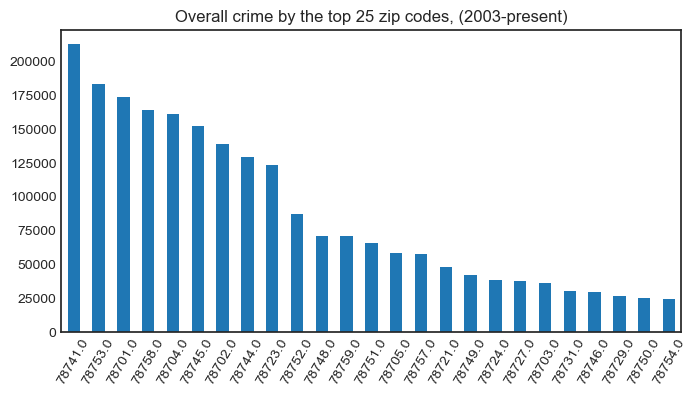

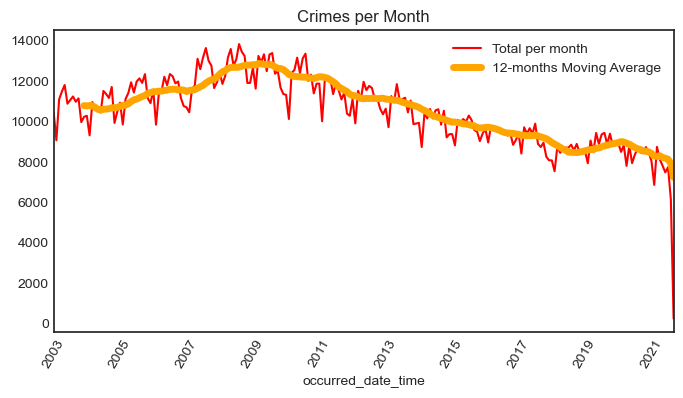

In [10]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25).to_frame())
display(df.zip_code.value_counts(normalize=True).head(25).to_frame())

# Visualizing the top 25 crime-ridden zip codes in Austin
plt.figure(figsize=(8, 4), dpi=100)
df.zip_code.value_counts().head(25).plot.bar(
    title="Overall crime by the top 25 zip codes, (2003-present)",
    # xlabel="Zip Code",
    # ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(figsize=(8, 4), dpi=100)
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange",
    linewidth=5,
    label="12-months Moving Average",
    title="Crimes per Month",
    rot=60,
)
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

highest_offense_description
BURGLARY OF VEHICLE                                  233746
THEFT                                                215123
FAMILY DISTURBANCE                                   185526
CRIMINAL MISCHIEF                                    130243
ASSAULT W/INJURY-FAM/DATE VIOL                        79913
BURGLARY OF RESIDENCE                                 78132
DWI                                                   70541
PUBLIC INTOXICATION                                   69239
HARASSMENT                                            65469
DISTURBANCE - OTHER                                   63053

BURGLARY OF VEHICLE  CRIMINAL MISCHIEF  HARASSMENT  \
occurred_date_time                                                       
2003-01-31                         1225                722         293   
2003-02-28                         1110                594         309   
2003-03-31                         1222                700         363   
2003-04-30                         1396                709         353   
2003-05-31                         1487                750         345   
...                                 ...                ...         ...   
2021-05-31                          348                398         150   
2021-06-30                          355                380         165   
2021-07-31                          490                396         136   
2021-08-31                          252                245          95   
2021-09-30                            8                  7           1   

                    ASSAULT W/INJURY-FAM/DATE VIOL  BURGLARY OF RESIDENCE  \
occurred_date_time                                                          
2003-01-31                                     349                    328   
2003-02-28                                     342                    248   
2003-03-31                                     421                    393   
2003-04-30                                     432                    398   
2003-05-31                                     424                    436   
...                                            ...                    ...   
2021-05-31                                     314                    156   
2021-06-30                                     268                    148   
2021-07-31                                     287                    161   
2021-08-31                                     256                    117   
2021-09-30                                      11                      9   

                    PUBLIC INTOXICATION  DWI  FAMILY DISTURBANCE  TOTAL  
occurred_date_time                                                       
2003-01-31                          341  407                 505   4170  
2003-02-28                          354  328                 500   3785  
2003-03-31                          450  406                 546   4501  
2003-04-30                          385  375                 678   4726  
2003-05-31                          451  418                 650   4961  
...                                 ...  ...                 ...    ...  
2021-05-31                           61  133                 885   2445  
2021-06-30                           70  126                 799   2311  
2021-07-31                           67  108                 881   2526  
2021-08-31                           80  153                 766   1964  
2021-09-30                            5   13                  11     65  

[225 rows x 9 columns]

<Figure size 432x288 with 0 Axes>

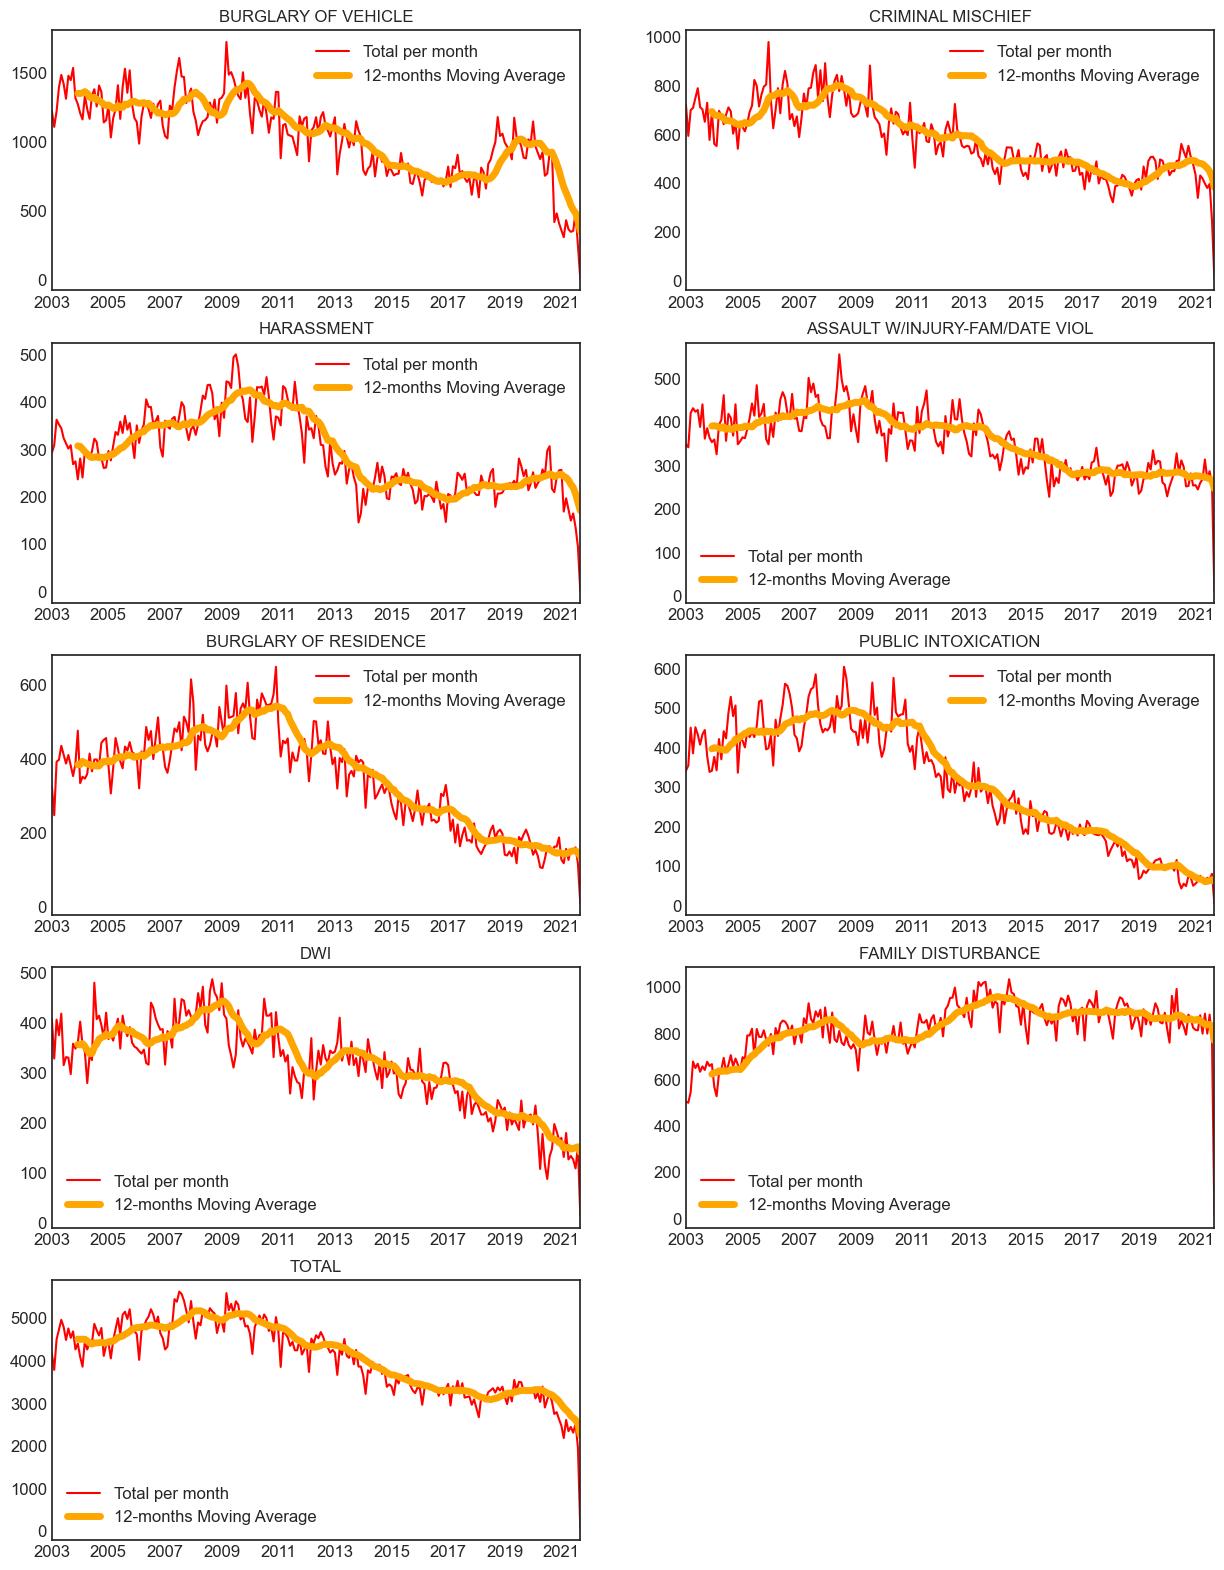

In [11]:
display(df["highest_offense_description"].value_counts().head(10).to_frame())

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly)

plt.figure(1)
plt.figure(figsize=(15, 20), dpi=100)

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

highest_offense_description
PUBLIC INTOXICATION                                   17303
THEFT                                                 16117
BURGLARY OF VEHICLE                                    9527
WARRANT ARREST NON TRAFFIC                             9045
DWI                                                    8468
ASSAULT WITH INJURY                                    7799
VIOL CITY ORDINANCE - OTHER                            6224
POSS OF DRUG PARAPHERNALIA                             6186
CRIMINAL MISCHIEF                                      6048
CRIMINAL TRESPASS                                      4023
DISTURBANCE - OTHER                                    3452
POSSESSION OF MARIJUANA                                3442
CUSTODY ARREST TRAFFIC WARR                            3011
POSS CONTROLLED SUB/NARCOTIC                           2962
CAMPING IN PARK                                        2804
VOCO - ALCOHOL  CONSUMPTION                            2706
ASSAULT BY CONTACT                                     2690
CRIMINAL TRESPASS/TRANSIENT                            2613
THEFT OF BICYCLE                                       2603
URINATING IN PUBLIC PLACE                              2354
FAMILY DISTURBANCE                                     2263
DOC FIGHTING                                           2172
PROTECTIVE ORDER                                       2099
ASSAULT W/INJURY-FAM/DATE VIOL                         1777

highest_offense_description
PUBLIC INTOXICATION                                0.100105
THEFT                                              0.093244
BURGLARY OF VEHICLE                                0.055118
WARRANT ARREST NON TRAFFIC                         0.052329
DWI                                                0.048991
ASSAULT WITH INJURY                                0.045121
VIOL CITY ORDINANCE - OTHER                        0.036009
POSS OF DRUG PARAPHERNALIA                         0.035789
CRIMINAL MISCHIEF                                  0.034990
CRIMINAL TRESPASS                                  0.023275
DISTURBANCE - OTHER                                0.019971
POSSESSION OF MARIJUANA                            0.019913
CUSTODY ARREST TRAFFIC WARR                        0.017420
POSS CONTROLLED SUB/NARCOTIC                       0.017136
CAMPING IN PARK                                    0.016222
VOCO - ALCOHOL  CONSUMPTION                        0.015655
ASSAULT BY CONTACT                                 0.015563
CRIMINAL TRESPASS/TRANSIENT                        0.015117
THEFT OF BICYCLE                                   0.015059
URINATING IN PUBLIC PLACE                          0.013619
FAMILY DISTURBANCE                                 0.013092
DOC FIGHTING                                       0.012566
PROTECTIVE ORDER                                   0.012144
ASSAULT W/INJURY-FAM/DATE VIOL                     0.010281

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

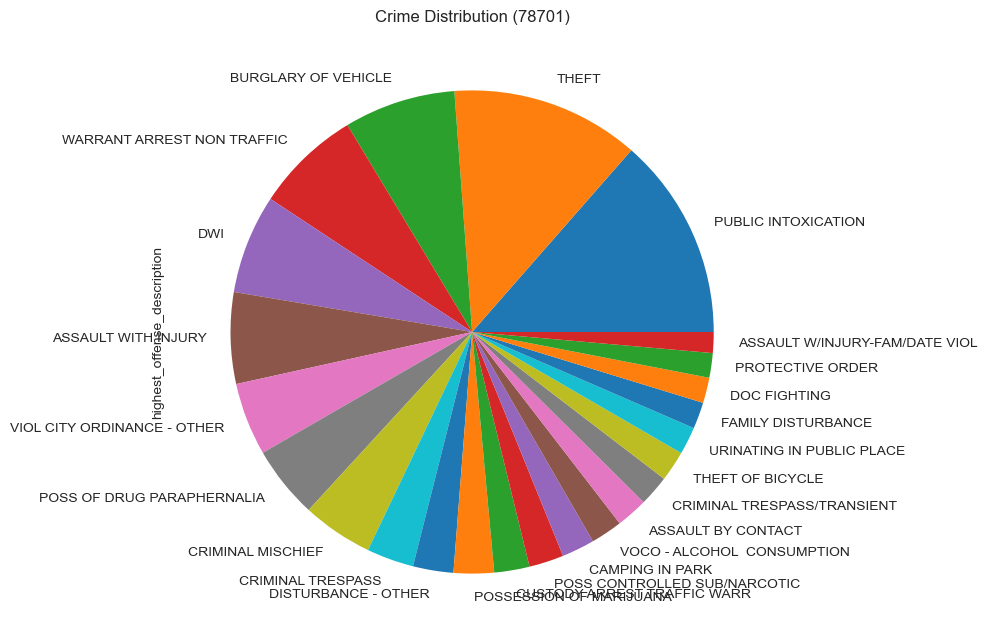

In [12]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off.to_frame())
display(
    df_01.highest_offense_description.value_counts(normalize=True).head(24).to_frame()
)
plt.figure(dpi=100)
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

highest_offense_description
THEFT                                                 17381
BURGLARY OF VEHICLE                                   16058
FAMILY DISTURBANCE                                    15124
CRIMINAL MISCHIEF                                      9645
THEFT BY SHOPLIFTING                                   7764
ASSAULT W/INJURY-FAM/DATE VIOL                         7336
BURGLARY OF RESIDENCE                                  6146
DWI                                                    5044
DISTURBANCE - OTHER                                    4894
AUTO THEFT                                             4432
HARASSMENT                                             4341
CUSTODY ARREST TRAFFIC WARR                            4313
POSS OF DRUG PARAPHERNALIA                             3728
ASSAULT WITH INJURY                                    3434
PUBLIC INTOXICATION                                    3372
CRIMINAL TRESPASS                                      3224
POSS CONTROLLED SUB/NARCOTIC                           3029
RUNAWAY CHILD                                          2981
WARRANT ARREST NON TRAFFIC                             2778
POSSESSION OF MARIJUANA                                2698
BURGLARY NON RESIDENCE                                 2538
VIOL CITY ORDINANCE - OTHER                            1860

----------------------------------


highest_offense_description
THEFT                                              0.095033
BURGLARY OF VEHICLE                                0.087799
FAMILY DISTURBANCE                                 0.082693
CRIMINAL MISCHIEF                                  0.052735
THEFT BY SHOPLIFTING                               0.042451
ASSAULT W/INJURY-FAM/DATE VIOL                     0.040111
BURGLARY OF RESIDENCE                              0.033604
DWI                                                0.027579
DISTURBANCE - OTHER                                0.026759
AUTO THEFT                                         0.024233
HARASSMENT                                         0.023735
CUSTODY ARREST TRAFFIC WARR                        0.023582
POSS OF DRUG PARAPHERNALIA                         0.020383
ASSAULT WITH INJURY                                0.018776
PUBLIC INTOXICATION                                0.018437
CRIMINAL TRESPASS                                  0.017628
POSS CONTROLLED SUB/NARCOTIC                       0.016562
RUNAWAY CHILD                                      0.016299
WARRANT ARREST NON TRAFFIC                         0.015189
POSSESSION OF MARIJUANA                            0.014752
BURGLARY NON RESIDENCE                             0.013877
VIOL CITY ORDINANCE - OTHER                        0.010170

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

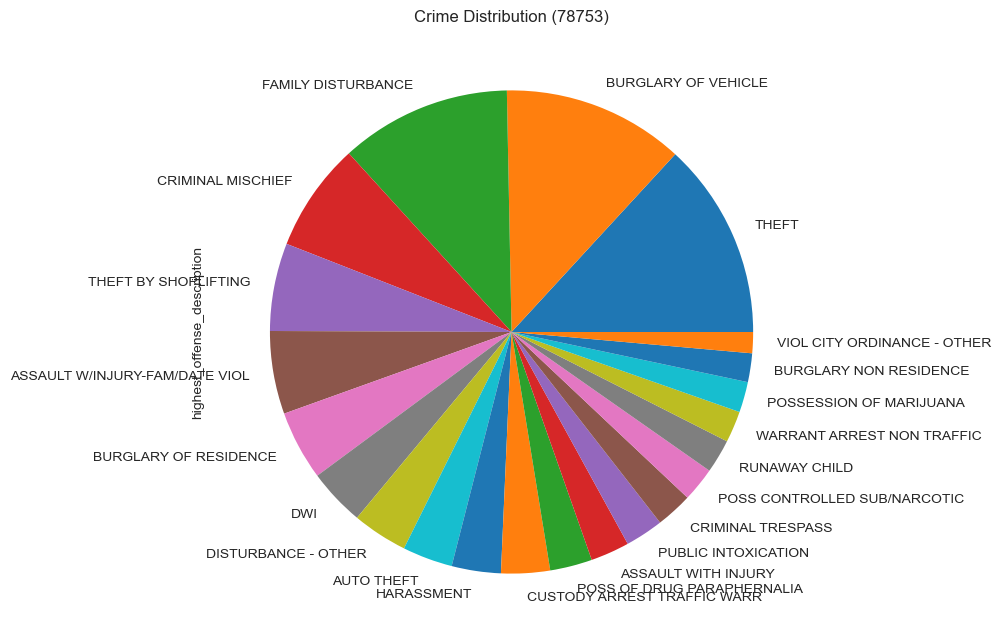

In [13]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_53_off.to_frame())
print("----------------------------------")
display(
    df_53.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)

plt.figure(dpi=100)
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

highest_offense_description
FAMILY DISTURBANCE                                    20935
BURGLARY OF VEHICLE                                   20082
THEFT                                                 15905
CRIMINAL MISCHIEF                                     11280
ASSAULT W/INJURY-FAM/DATE VIOL                         9812
BURGLARY OF RESIDENCE                                  9015
PUBLIC INTOXICATION                                    6459
CUSTODY ARREST TRAFFIC WARR                            6051
DWI                                                    5847
HARASSMENT                                             5635
DISTURBANCE - OTHER                                    5293
AUTO THEFT                                             4851
ASSAULT WITH INJURY                                    4671
CRIMINAL TRESPASS                                      4042
POSS CONTROLLED SUB/NARCOTIC                           3963
POSSESSION OF MARIJUANA                                3855
THEFT BY SHOPLIFTING                                   3626
POSS OF DRUG PARAPHERNALIA                             3581
WARRANT ARREST NON TRAFFIC                             3477
RUNAWAY CHILD                                          2819
VIOL CITY ORDINANCE - OTHER                            2211

----------------------------------


highest_offense_description
FAMILY DISTURBANCE                                 0.098643
BURGLARY OF VEHICLE                                0.094624
THEFT                                              0.074943
CRIMINAL MISCHIEF                                  0.053150
ASSAULT W/INJURY-FAM/DATE VIOL                     0.046233
BURGLARY OF RESIDENCE                              0.042478
PUBLIC INTOXICATION                                0.030434
CUSTODY ARREST TRAFFIC WARR                        0.028512
DWI                                                0.027550
HARASSMENT                                         0.026552
DISTURBANCE - OTHER                                0.024940
AUTO THEFT                                         0.022857
ASSAULT WITH INJURY                                0.022009
CRIMINAL TRESPASS                                  0.019045
POSS CONTROLLED SUB/NARCOTIC                       0.018673
POSSESSION OF MARIJUANA                            0.018164
THEFT BY SHOPLIFTING                               0.017085
POSS OF DRUG PARAPHERNALIA                         0.016873
WARRANT ARREST NON TRAFFIC                         0.016383
RUNAWAY CHILD                                      0.013283
VIOL CITY ORDINANCE - OTHER                        0.010418

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

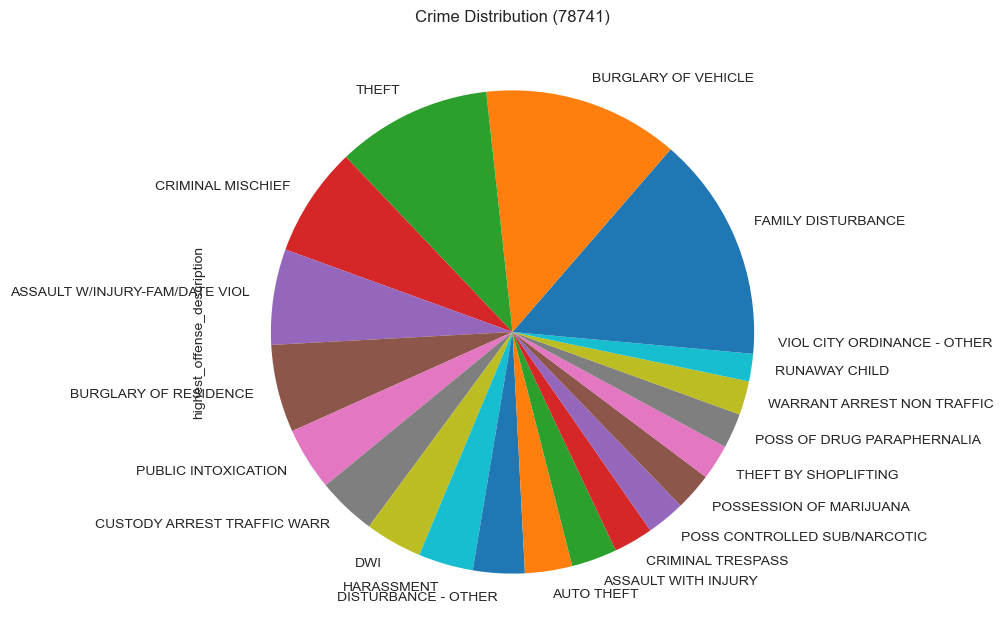

In [14]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
display(df_41_off.to_frame())
print("----------------------------------")
display(
    df_41.highest_offense_description.value_counts(normalize=True).head(21).to_frame()
)
plt.figure(dpi=100)
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

highest_offense_description
FAMILY DISTURBANCE                                    15338
BURGLARY OF VEHICLE                                   14762
THEFT                                                 13233
CRIMINAL MISCHIEF                                      8626
BURGLARY OF RESIDENCE                                  5927
ASSAULT W/INJURY-FAM/DATE VIOL                         5853
HARASSMENT                                             5199
DISTURBANCE - OTHER                                    4576
DWI                                                    4373
PUBLIC INTOXICATION                                    3962
CUSTODY ARREST TRAFFIC WARR                            3184
AUTO THEFT                                             2953
BURGLARY NON RESIDENCE                                 2910
ASSAULT WITH INJURY                                    2715
RUNAWAY CHILD                                          2629
POSSESSION OF MARIJUANA                                2562
WARRANT ARREST NON TRAFFIC                             2055
POSS CONTROLLED SUB/NARCOTIC                           2013
CRIMINAL TRESPASS                                      1940
IDENTITY THEFT                                         1679
THEFT BY SHOPLIFTING                                   1555
POSS OF DRUG PARAPHERNALIA                             1512

----------------------------------


highest_offense_description
FAMILY DISTURBANCE                                 0.101128
BURGLARY OF VEHICLE                                0.097330
THEFT                                              0.087249
CRIMINAL MISCHIEF                                  0.056874
BURGLARY OF RESIDENCE                              0.039079
ASSAULT W/INJURY-FAM/DATE VIOL                     0.038591
HARASSMENT                                         0.034279
DISTURBANCE - OTHER                                0.030171
DWI                                                0.028833
PUBLIC INTOXICATION                                0.026123
CUSTODY ARREST TRAFFIC WARR                        0.020993
AUTO THEFT                                         0.019470
BURGLARY NON RESIDENCE                             0.019187
ASSAULT WITH INJURY                                0.017901
RUNAWAY CHILD                                      0.017334
POSSESSION OF MARIJUANA                            0.016892
WARRANT ARREST NON TRAFFIC                         0.013549
POSS CONTROLLED SUB/NARCOTIC                       0.013272
CRIMINAL TRESPASS                                  0.012791
IDENTITY THEFT                                     0.011070
THEFT BY SHOPLIFTING                               0.010253
POSS OF DRUG PARAPHERNALIA                         0.009969

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

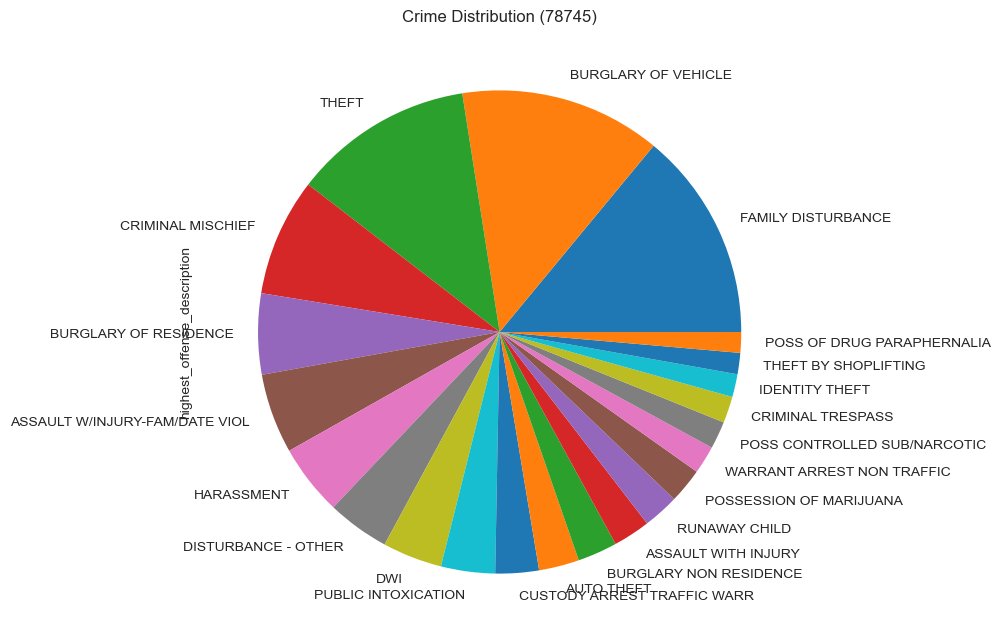

In [15]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
display(df_45_off.to_frame())
print("----------------------------------")
display(
    df_45.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
plt.figure(dpi=100)
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

highest_offense_description
BURGLARY OF VEHICLE                                    8720
THEFT                                                  5641
CRIMINAL MISCHIEF                                      5031
THEFT OF BICYCLE                                       3559
PUBLIC INTOXICATION                                    2628
BURGLARY OF RESIDENCE                                  2160
WARRANT ARREST NON TRAFFIC                             1516
AUTO THEFT                                             1434
CRIMINAL TRESPASS                                      1384
ASSAULT WITH INJURY                                    1251
HARASSMENT                                             1242
FAMILY DISTURBANCE                                     1237
DWI                                                    1202
DISTURBANCE - OTHER                                    1131
BURGLARY NON RESIDENCE                                  902
CRIMINAL TRESPASS/TRANSIENT                             864
GRAFFITI                                                783
CUSTODY ARREST TRAFFIC WARR                             768
VIOL CITY ORDINANCE - OTHER                             755
ASSAULT W/INJURY-FAM/DATE VIOL                          711
POSSESSION OF MARIJUANA                                 666
SUSPICIOUS PERSON                                       624

'----------------------------------'

highest_offense_description
BURGLARY OF VEHICLE                                0.150200
THEFT                                              0.097165
CRIMINAL MISCHIEF                                  0.086658
THEFT OF BICYCLE                                   0.061303
PUBLIC INTOXICATION                                0.045267
BURGLARY OF RESIDENCE                              0.037205
WARRANT ARREST NON TRAFFIC                         0.026113
AUTO THEFT                                         0.024700
CRIMINAL TRESPASS                                  0.023839
ASSAULT WITH INJURY                                0.021548
HARASSMENT                                         0.021393
FAMILY DISTURBANCE                                 0.021307
DWI                                                0.020704
DISTURBANCE - OTHER                                0.019481
BURGLARY NON RESIDENCE                             0.015537
CRIMINAL TRESPASS/TRANSIENT                        0.014882
GRAFFITI                                           0.013487
CUSTODY ARREST TRAFFIC WARR                        0.013229
VIOL CITY ORDINANCE - OTHER                        0.013005
ASSAULT W/INJURY-FAM/DATE VIOL                     0.012247
POSSESSION OF MARIJUANA                            0.011472
SUSPICIOUS PERSON                                  0.010748

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

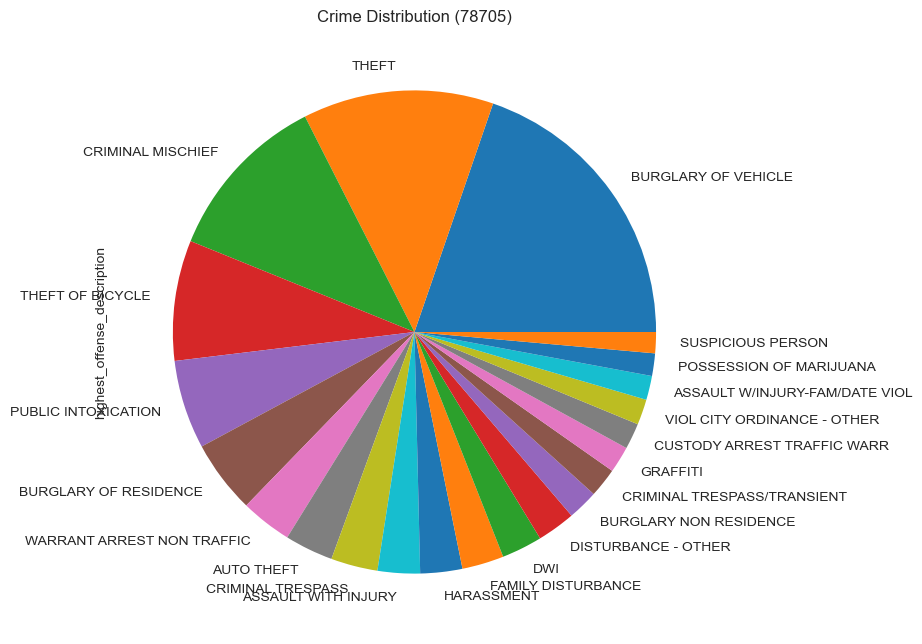

In [16]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off.to_frame())
display("----------------------------------")
display(
    df_05.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
plt.figure(dpi=100)
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

highest_offense_description
BURGLARY OF VEHICLE                                    5476
THEFT                                                  5362
THEFT BY SHOPLIFTING                                   2569
CRIMINAL MISCHIEF                                      1304
DWI                                                     895
FAMILY DISTURBANCE                                      785
HARASSMENT                                              645
VIOL CITY ORDINANCE - OTHER                             639
AUTO THEFT                                              626
BURGLARY OF RESIDENCE                                   528
THEFT FROM PERSON                                       473
IDENTITY THEFT                                          458
DISTURBANCE - OTHER                                     456
BURGLARY NON RESIDENCE                                  374
ASSAULT W/INJURY-FAM/DATE VIOL                          349
CRED CARD ABUSE - OTHER                                 335
PUBLIC INTOXICATION                                     334
POSSESSION OF MARIJUANA                                 311
FRAUD - OTHER                                           286
SUSPICIOUS PERSON                                       263
CUSTODY ARREST TRAFFIC WARR                             248
THEFT OF BICYCLE                                        241
WARRANT ARREST NON TRAFFIC                              227
ASSAULT WITH INJURY                                     215

highest_offense_description
BURGLARY OF VEHICLE                                0.188198
THEFT                                              0.184280
THEFT BY SHOPLIFTING                               0.088291
CRIMINAL MISCHIEF                                  0.044816
DWI                                                0.030759
FAMILY DISTURBANCE                                 0.026979
HARASSMENT                                         0.022167
VIOL CITY ORDINANCE - OTHER                        0.021961
AUTO THEFT                                         0.021514
BURGLARY OF RESIDENCE                              0.018146
THEFT FROM PERSON                                  0.016256
IDENTITY THEFT                                     0.015740
DISTURBANCE - OTHER                                0.015672
BURGLARY NON RESIDENCE                             0.012854
ASSAULT W/INJURY-FAM/DATE VIOL                     0.011994
CRED CARD ABUSE - OTHER                            0.011513
PUBLIC INTOXICATION                                0.011479
POSSESSION OF MARIJUANA                            0.010688
FRAUD - OTHER                                      0.009829
SUSPICIOUS PERSON                                  0.009039
CUSTODY ARREST TRAFFIC WARR                        0.008523
THEFT OF BICYCLE                                   0.008283
WARRANT ARREST NON TRAFFIC                         0.007801
ASSAULT WITH INJURY                                0.007389

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

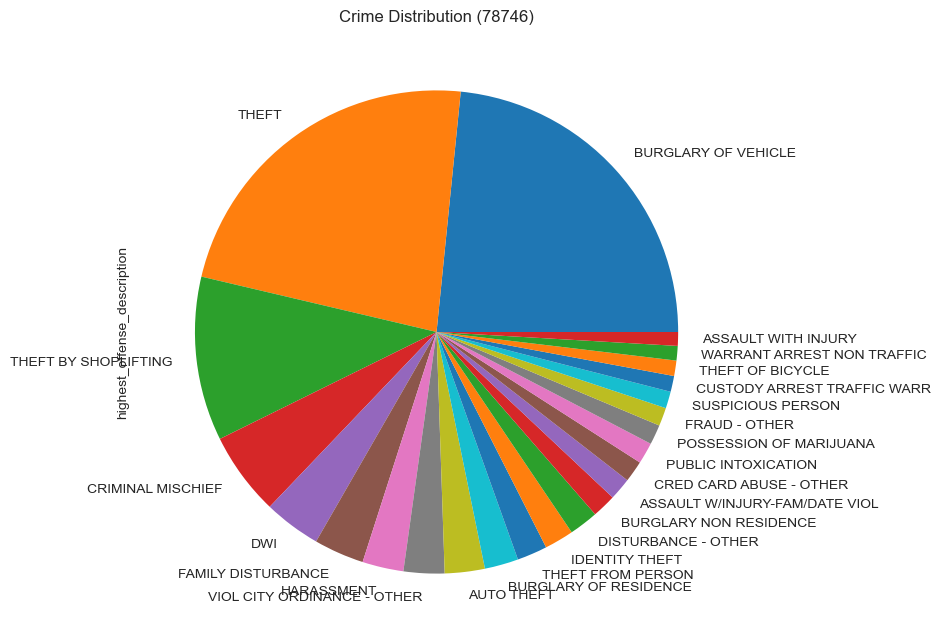

In [17]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off.to_frame())
display(
    df_46.highest_offense_description.value_counts(normalize=True).head(24).to_frame()
)
plt.figure(dpi=100)
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes istributed? 

In [18]:
# Creating separate dataframes for violent crime & murder rates
df_viol = df.query(
    'category_description == ["Aggravated Assault", "Robbery", "Rape", "Murder"]'
)
df_mur = df[df.category_description == "Murder"]
df_agg_asslt = df[df.category_description == "Aggravated Assault"]
df_robbery = df[df.category_description == "Robbery"]
df_rape = df[df.category_description == "Rape"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]
df_21 = df[df.year == 2021]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]
df_viol_21 = df_viol[df_viol.year == 2021]

# Annual murders
df_mur_17 = df_mur[df_mur.year == 2017]
df_mur_18 = df_mur[df_mur.year == 2018]
df_mur_19 = df_mur[df_mur.year == 2019]
df_mur_20 = df_mur[df_mur.year == 2020]
df_mur_21 = df_mur[df_mur.year == 2021]

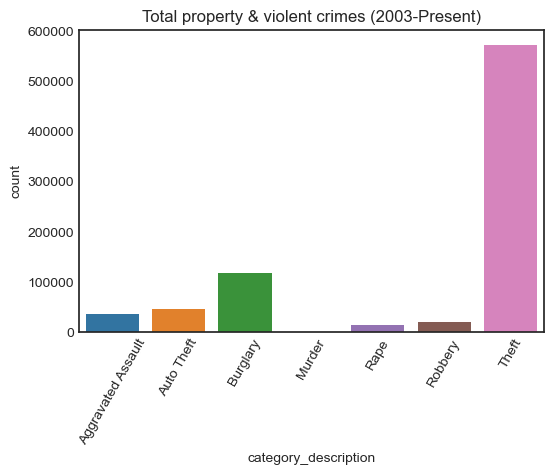

Theft                 572967
Burglary              117870
Auto Theft             45818
Aggravated Assault     36207
Robbery                20634
Rape                   13671
Murder                   565
Name: category_description, dtype: int64

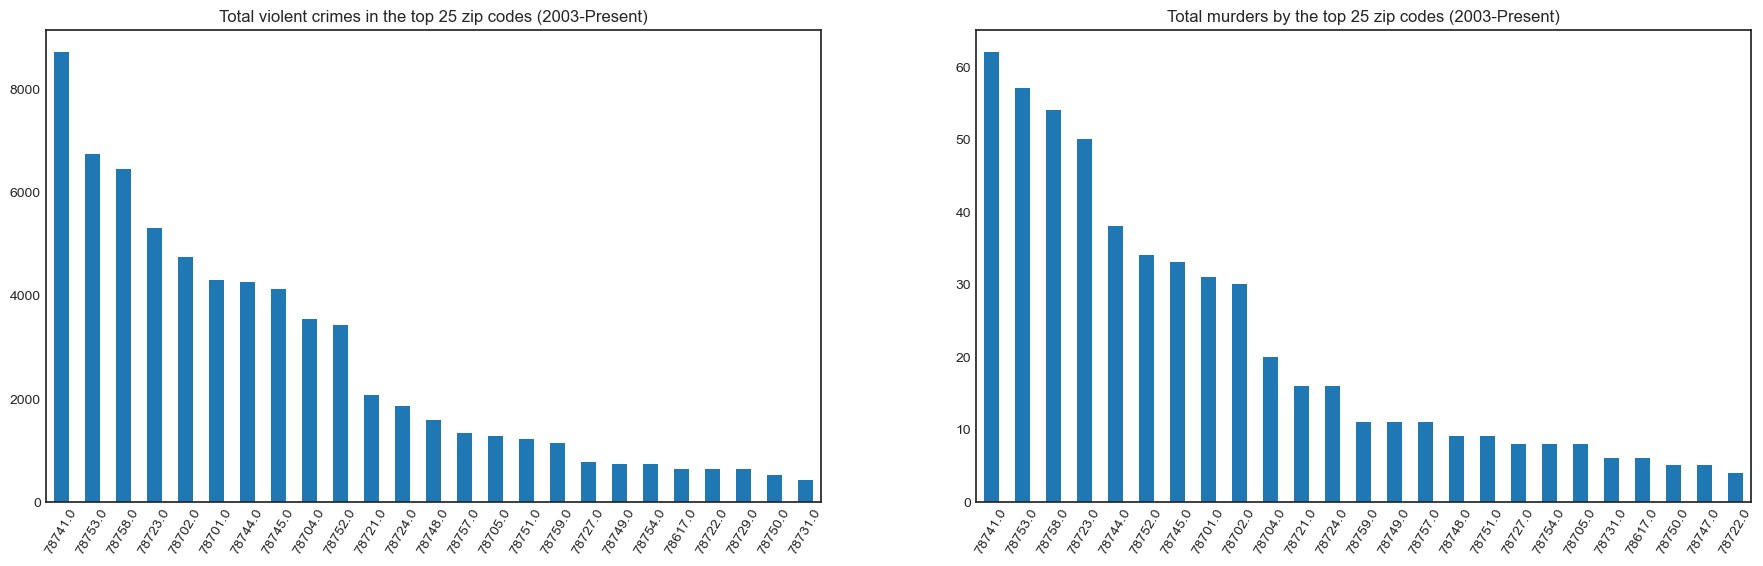

category_description  Aggravated Assault  Murder  Rape  Robbery
zip_code                                                       
0.0                                    1       0     0        0
78610.0                                2       0     3        0
78613.0                               46       1    30       61
78617.0                              366       6   160      107
78621.0                                2       0     0        0
78634.0                                1       0     0        0
78640.0                                0       0     3        0
78641.0                                1       0     0        0
78645.0                                0       0     1        0
78652.0                                7       0     1        0
78653.0                               35       0     6        4
78660.0                              159       3    43       51
78664.0                                7       0     7        0
78665.0                                0       0     1        0
78669.0                                0       0     1        0
78681.0                                3       0     3        0
78701.0                             2112      31   778     1377
78702.0                             2436      30   620     1645
78703.0                              169       2    86      113
78704.0                             1694      20   798     1023
78705.0                              501       8   454      314
78712.0                                7       0     3        4
78717.0                              156       1    48       41
78719.0                               21       0     3        9
78721.0                             1294      16   312      444
78722.0                              282       4   100      250
78723.0                             2658      50   818     1773
78724.0                             1151      16   356      333
78725.0                               78       1    42       13
78726.0                              178       2    93       32
78727.0                              424       8   177      157
78728.0                               21       1    11        3
78729.0                              341       2   151      137
78730.0                               34       0    18        4
78731.0                              195       6   120       92
78732.0                                3       0     2        2
78733.0                                2       0     5        1
78735.0                              226       3    77       46
78736.0                               61       0    31       14
78737.0                                8       0     5        2
78738.0                                1       0     0        0
78739.0                               35       0    37        3
78741.0                             4232      62  1379     3034
78742.0                               73       1    20       23
78744.0                             2376      38   900      945
78745.0                             2226      33   854     1008
78746.0                              132       3    78      134
78747.0                              240       5    96       47
78748.0                              865       9   386      324
78749.0                              360      11   208      145
78750.0                              262       5   138      107
78751.0                              534       9   282      395
78752.0                             1672      34   499     1209
78753.0                             3406      57  1139     2123
78754.0                              399       8   165      148
78756.0                              156       2    99       99
78757.0                              679      11   233      404
78758.0                             3174      54  1107     2102
78759.0                              576      11   261      295

<Figure size 432x288 with 0 Axes>

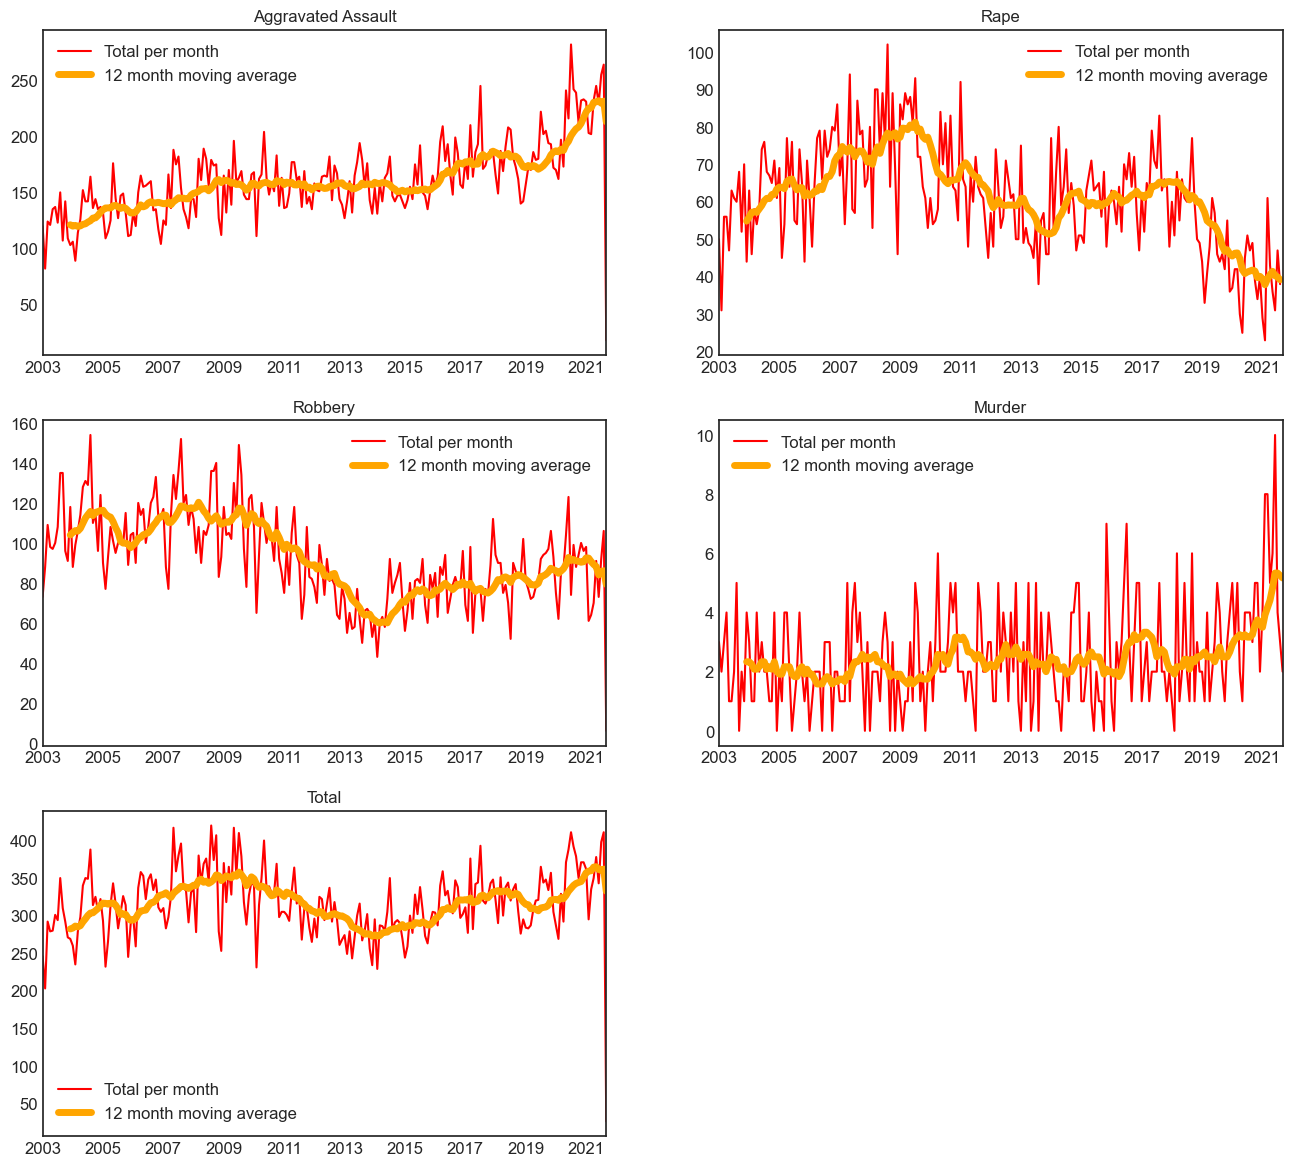

In [19]:
plt.figure(dpi=100)
plt.xlabel("Crime Type")
plt.ylabel("Total Incidents")
plt.xticks(rotation="60")
sb.countplot(df.category_description).set_title(
    "Total property & violent crimes (2003-Present)"
)
plt.show()

# display(df_viol.zip_code.value_counts(normalize=True).head(25))
display(df.category_description.value_counts())

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2, dpi=100)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Total violent crimes in the top 25 zip codes (2003-Present)",
#     xlabel="Zip Code",
#     ylabel="Total Crimes",
    rot=60,
    ax=axs[0],
)
df_mur.zip_code.value_counts().head(25).plot.bar(
    title="Total murders by the top 25 zip codes (2003-Present)",
#     xlabel="Zip Code",
#     ylabel="Total Murders",
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.category_description)
mur_freq = pd.crosstab(df_mur.zip_code, df_mur.category_description)
display(viol_freq)

monthly_viol = pd.DataFrame(
    df_viol[df_viol["category_description"] == "Aggravated Assault"]
    .resample("M")
    .size()
)
monthly_viol.columns = ["Aggravated Assault"]

for i in df_viol["category_description"].unique():
    monthly_viol[i] = pd.DataFrame(
        df_viol[df_viol["category_description"] == i].resample("M").size()
    )

monthly_viol["Total"] = monthly_viol.sum(axis=1)

ViolCrimeTypes = monthly_viol.columns

plt.figure(1)
plt.figure(figsize=(16, 25), dpi=100)

i = 521
for eachCrime in ViolCrimeTypes:
    plt.subplot(i)
    monthly_viol[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly_viol[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1

viol_freq.to_csv("viol_freq.csv")

### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

<Figure size 600x400 with 0 Axes>

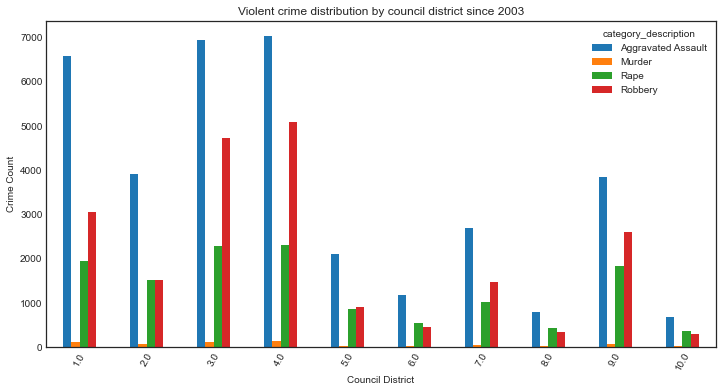

<Figure size 600x400 with 0 Axes>

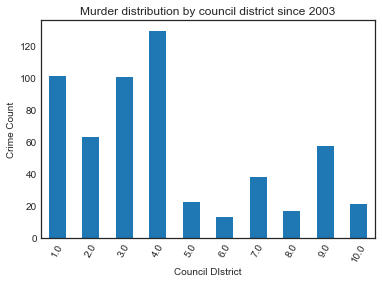

<Figure size 600x400 with 0 Axes>

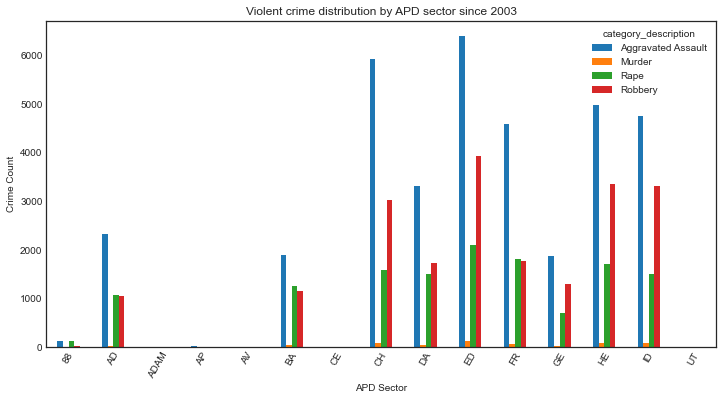

<Figure size 600x400 with 0 Axes>

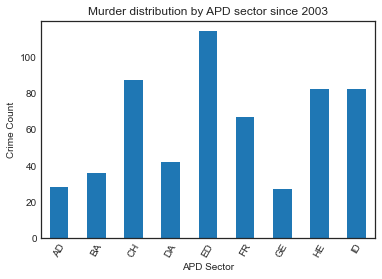

<Figure size 600x400 with 0 Axes>

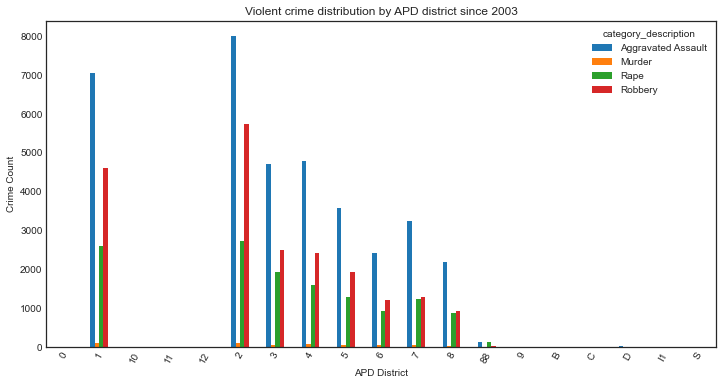

<Figure size 600x400 with 0 Axes>

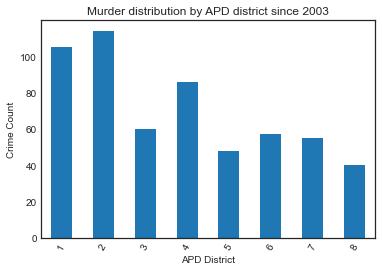

In [20]:
plt.figure(dpi=100)
pd.crosstab(df_viol.council_district, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    rot=60,
    xlabel="Council District",
    ylabel="Crime Count",
    title="Violent crime distribution by council district since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.council_district, df_mur.category_description).plot.bar(
    rot=60,
    xlabel="Council DIstrict",
    ylabel="Crime Count",
    title="Murder distribution by council district since 2003",
    legend=False,
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol.apd_sector, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    xlabel="APD Sector",
    ylabel="Crime Count",
    rot=60,
    title="Violent crime distribution by APD sector since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.apd_sector, df_mur.category_description).plot.bar(
    xlabel="APD Sector",
    ylabel="Crime Count",
    rot=60,
    title="Murder distribution by APD sector since 2003",
    legend=False,
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol.apd_district, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    xlabel="APD District",
    ylabel="Crime Count",
    rot=60,
    title="Violent crime distribution by APD district since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.apd_district, df_mur.category_description).plot.bar(
    xlabel="APD District",
    ylabel="Crime Count",
    rot=60,
    title="Murder distribution by APD district since 2003",
    legend=False,
)
plt.show()

### K. Violent crime and murder distribution by location type

category_description                            Aggravated Assault  Murder  \
location_type                                                                
ABANDONED/CONDEMNED STRUCTURE                                   21       1   
AMUSEMENT PARK                                                   1       0   
ARENA / STADIUM / FAIRGROUNDS / COLISEUM                         3       0   
ATM SEPARATE FROM BANK                                           2       0   
AUTO DEALERSHIP NEW / USED                                      13       0   
BANKS / SAVINGS & LOAN                                          17       1   
BAR / NIGHT CLUB                                               762      12   
CAMP / CAMPGROUND                                               49       0   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                            34       1   
COMMERCIAL / OFFICE BUILDING                                   409       9   
COMMUNITY CENTER                                                10       0   
CONSTRUCTION SITE                                               38       0   
CONVENIENCE STORE                                              291       4   
DAYCARE FACILITY                                                 0       0   
DEPARTMENT / DISCOUNT STORE                                     63       0   
DRUG STORE / DR. OFFICE / HOSPITAL                             125       6   
FIELD / WOODS                                                  291      19   
GAMBLING FACILITY / CASINO / RACE TRACK                         10       1   
GAS / SERVICE STATIONS                                         277       7   
GOVERNMENT / PUBLIC BUILDING                                   113       2   
GROCERY / SUPERMARKET                                           73       2   
HOTEL / MOTEL / ETC.                                           793      15   
INDUSTRIAL SITE                                                  5       0   
JAIL / PRISON                                                    6       0   
LAKE / WATERWAY                                                 10       1   
LIQUOR STORE                                                     9       1   
OTHER / UNKNOWN                                                472      13   
PARK / PLAYGROUND                                              193       1   
PARKING LOTS / GARAGE                                         4995     105   
RENTAL STORAGE FACILITY                                         21       1   
RESIDENCE / HOME                                             18028     239   
REST AREA                                                        2       0   
RESTAURANTS                                                    262       3   
SCHOOL - COLLEGE / UNIVERSITY                                    5       0   
SCHOOL - ELEMENTARY / SECONDARY                                 11       0   
SCHOOLS / COLLEGES                                              43       2   
SHELTER-MISSION / HOMELESS                                      24       0   
SHOPPING MALL                                                   11       0   
SPECIALTY  STORE (TV  FUR ETC.)                                 53       0   
STREETS / HWY / ROAD / ALLEY                                  8499     116   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)                 110       1   
TRIBAL LANDS                                                     0       0   

category_description                            Rape  Robbery  
location_type                                                  
ABANDONED/CONDEMNED STRUCTURE                     14       12  
AMUSEMENT PARK                                     1        1  
ARENA / STADIUM / FAIRGROUNDS / COLISEUM           0        0  
ATM SEPARATE FROM BANK                             0        8  
AUTO DEALERSHIP NEW / USED                         2        2  
BANKS / SAVINGS & LOAN                            10      399  
BAR / NIGHT CLUB                                 162   

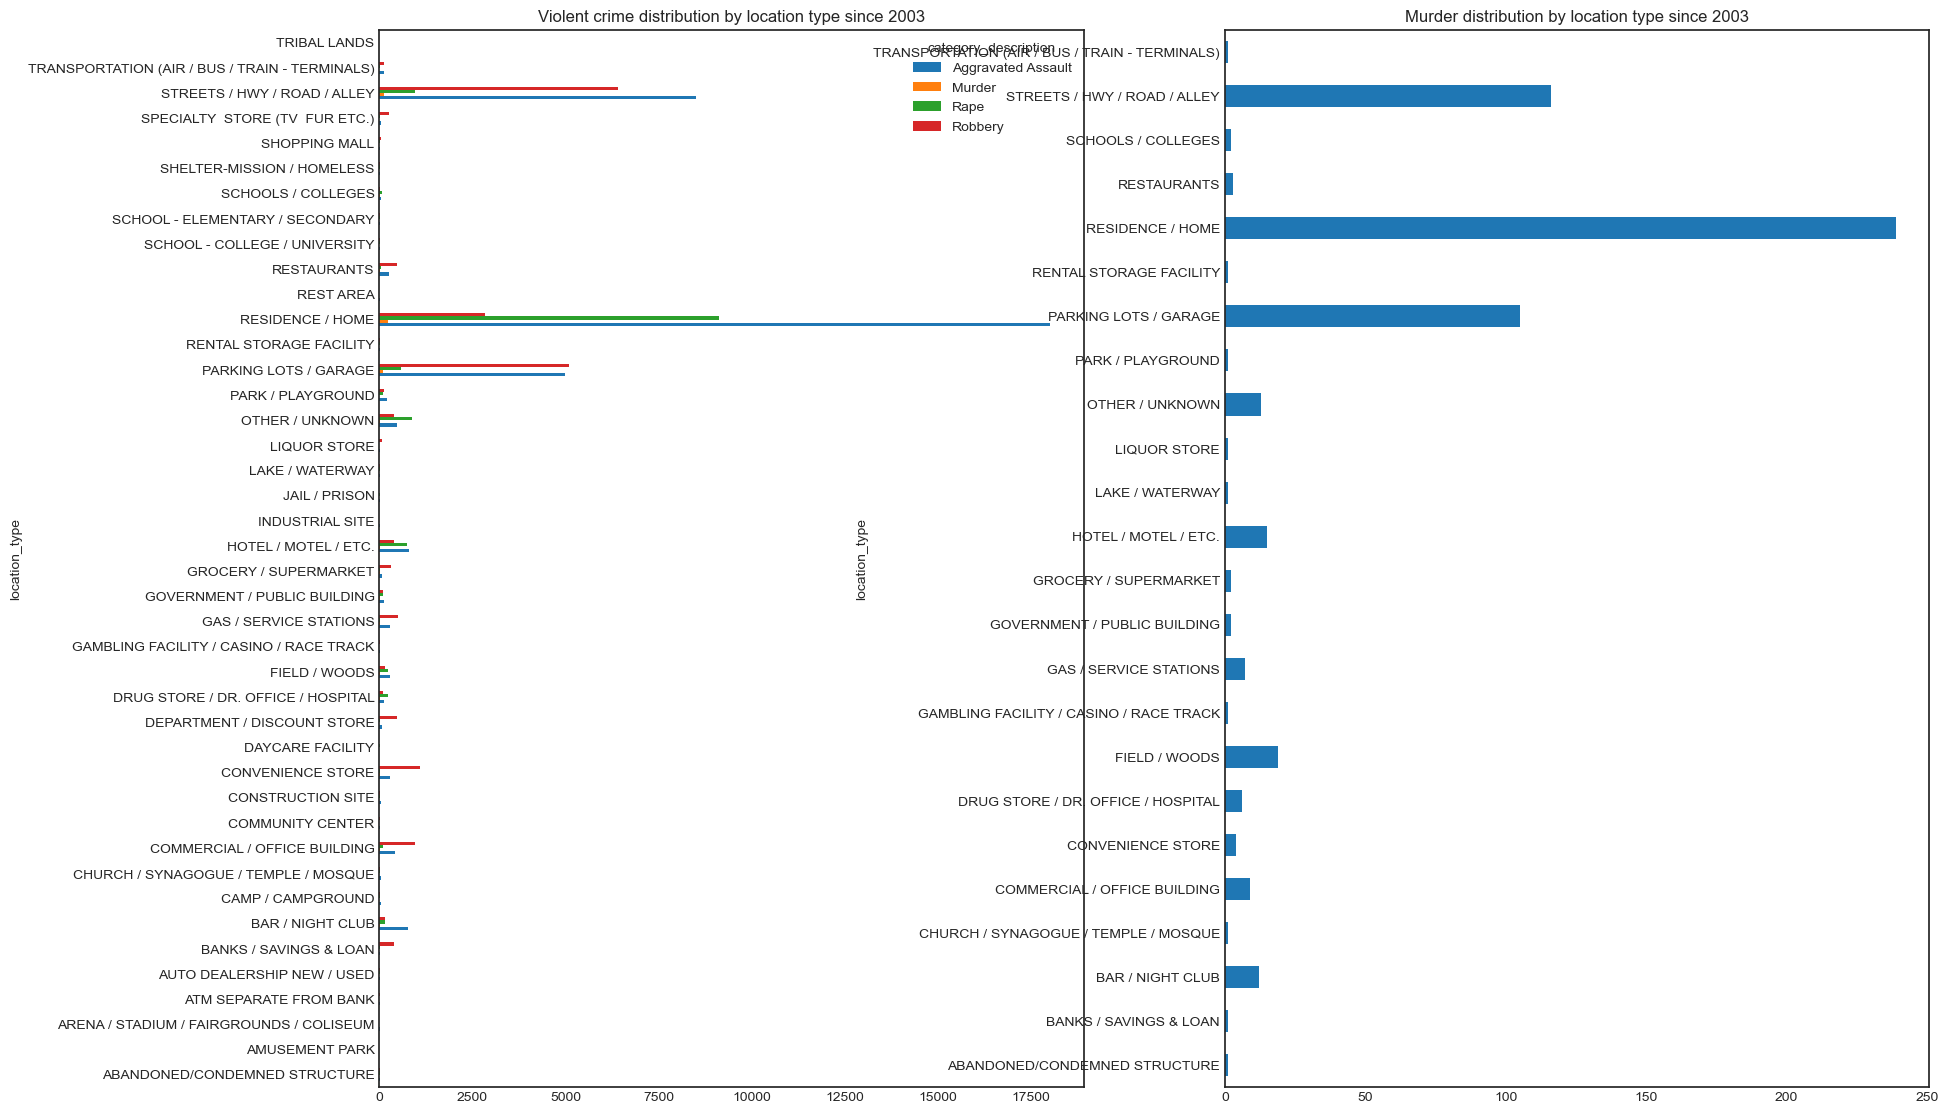

In [21]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.category_description)
display(viol_loc)

mur_loc = pd.crosstab(df_mur.location_type, df_mur.category_description)

fig, axs = plt.subplots(figsize=(20, 14), dpi=100, ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003", ax=axs[0],
)
mur_loc.plot.barh(
    title="Murder distribution by location type since 2003", legend=False, ax=axs[1]
)
plt.show()


viol_loc.to_csv("viol_loc.csv")

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [22]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Robbery 

In [23]:
agg_robbery_coords_heat = df_robbery[
    (df_robbery["latitude"].isnull() == False)
    & (df_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [24]:
mur_coords_heat = df_mur[
    (df_mur["latitude"].isnull() == False) & (df_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [25]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(50).to_frame()

address
00 BLOCK UNKNOWN                    164
900 BLOCK E 32ND ST                 147
1137 GUNTER ST                      144
500 E 7TH ST                        135
1030 NORWOOD PARK BLVD              135
6409 SPRINGDALE RD                  132
1700 BURTON DR                      127
1071 CLAYTON LN                     116
6103 MANOR RD                       112
9024 NORTHGATE BLVD                 111
9200 NORTH PLZ                      108
1124 RUTLAND DR                     104
1054 SPRINGDALE RD                  103
2901 S CAPITAL OF TEXAS HWY NB       98
9601 MIDDLE FISKVILLE RD             97
9515 N LAMAR BLVD                    95
5800 TECHNI CENTER DR                95
1000 E 41ST ST                       92
1500 FARO DR                         92
12151 N IH 35 SVRD NB                92
10000 N LAMAR BLVD                   91
6118 FAIRWAY ST                      91
700 BLOCK E 8TH ST                   89
7020 GRAND CANYON DR                 89
8800 N IH 35 SVRD SB                 87
1515 WICKERSHAM LN                   85
2237 E RIVERSIDE DR                  85
9300 NORTHGATE BLVD                  85
2500 BLOCK S CONGRESS AVE            84
2401 S LAKESHORE BLVD                84
8312 N IH 35 SVRD SB                 81
9010 GALEWOOD DR                     81
1300 CROSSING PL                     80
2201 WILLOW CREEK DR                 79
6855 E US 290 HWY SVRD EB            79
7000 DECKER LN                       79
1845 BURTON DR                       77
3909 N IH 35 SVRD NB                 77
9001 NORTHGATE BLVD                  75
4900 BLOCK MUELLER BLVD              74
2400 WICKERSHAM LN                   74
8926 N LAMAR BLVD                    73
1601 ROYAL CREST DR                  73
4404 E OLTORF ST                     72
2005 WILLOW CREEK DR                 72
2101 BURTON DR                       72
1600 WICKERSHAM LN                   71
919 E 32ND ST                        68
2200 S PLEASANT VALLEY RD            68
3603 SOUTHRIDGE DR                   68

In [26]:
# Show addresses with 2 or more reported murders
df_mur.address.value_counts().head(35).to_frame()

address
6409 SPRINGDALE RD               3
4700 E RIVERSIDE DR              3
6407 SPRINGDALE RD               3
8800 N IH 35 SVRD SB             3
8610 N LAMAR BLVD                3
601 E 15TH ST                    3
9220 N IH 35 SVRD SB             2
11105 N IH 35 SVRD NB            2
9601 MIDDLE FISKVILLE RD         2
2501 ANKEN DR                    2
2915 S IH 35 SVRD NB             2
2713 S CONGRESS AVE              2
1711 RUTLAND DR                  2
833 FAIRFIELD DR                 2
9036 N LAMAR BLVD                2
9010 GALEWOOD DR                 2
9200 NORTH PLZ                   2
7000 DECKER LN                   2
2400 WICKERSHAM LN               2
8912 N LAMAR BLVD                2
7330 BLUFF SPRINGS RD            2
2508 E RIVERSIDE DR              2
815 W SLAUGHTER LN               2
744 W WILLIAM CANNON DR          2
8225 SAM RAYBURN DR              2
201 W 5TH ST                     2
4900 E OLTORF ST                 2
2400 E RIVERSIDE DR              2
1050 SPRINGDALE RD               2
1200 BLOCK E 38TH HALF ST        2
200 BLOCK E 6TH ST               2
7100 N IH 35 SVRD SB             2
605 MASTERSON PASS               2
6600 ED BLUESTEIN BLVD SB        2
10610 MORADO CIR                 2

In [27]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")
df_21.to_csv("df_21.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")
df_viol_21.to_csv("df_viol_21.csv")

df_mur_17.to_csv("df_mur_17.csv")
df_mur_18.to_csv("df_mur_18.csv")
df_mur_19.to_csv("df_mur_19.csv")
df_mur_20.to_csv("df_mur_20.csv")
df_mur_21.to_csv("df_mur_21.csv")

df_viol.to_csv("df_viol.csv")
df_mur.to_csv("df_mur.csv")
df_agg_asslt.to_csv("df_agg_asslt.csv")
df_rape.to_csv("df_rape.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")